In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [7]:
# Load datasets
ppg_data_combined = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/combined_dataset.xlsx')

ppg_data_combined['Sex(M/F)'] = ppg_data_combined['Sex(M/F)'].map({'Male': 1, 'Female': 0})

print(ppg_data_combined)

     Num.  subject_ID  Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  \
0       1           2         0         45         152          63   
1       1           2         0         45         152          63   
2       1           2         0         45         152          63   
3       2           3         0         50         157          50   
4       2           3         0         50         157          50   
..    ...         ...       ...        ...         ...         ...   
652   218         418         1         25         173          63   
653   218         418         1         25         173          63   
654   219         419         1         24         175          58   
655   219         419         1         24         175          58   
656   219         419         1         24         175          58   

     Systolic Blood Pressure(mmHg)  Diastolic Blood Pressure(mmHg)  \
0                              161                              89   
1                  

In [8]:
num_subjects = ppg_data_combined['subject_ID'].nunique()
print(num_subjects)


219


In [9]:
ppg_data_combined.columns

Index(['Num.', 'subject_ID', 'Sex(M/F)', 'Age(year)', 'Height(cm)',
       'Weight(kg)', 'Systolic Blood Pressure(mmHg)',
       'Diastolic Blood Pressure(mmHg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=2114)

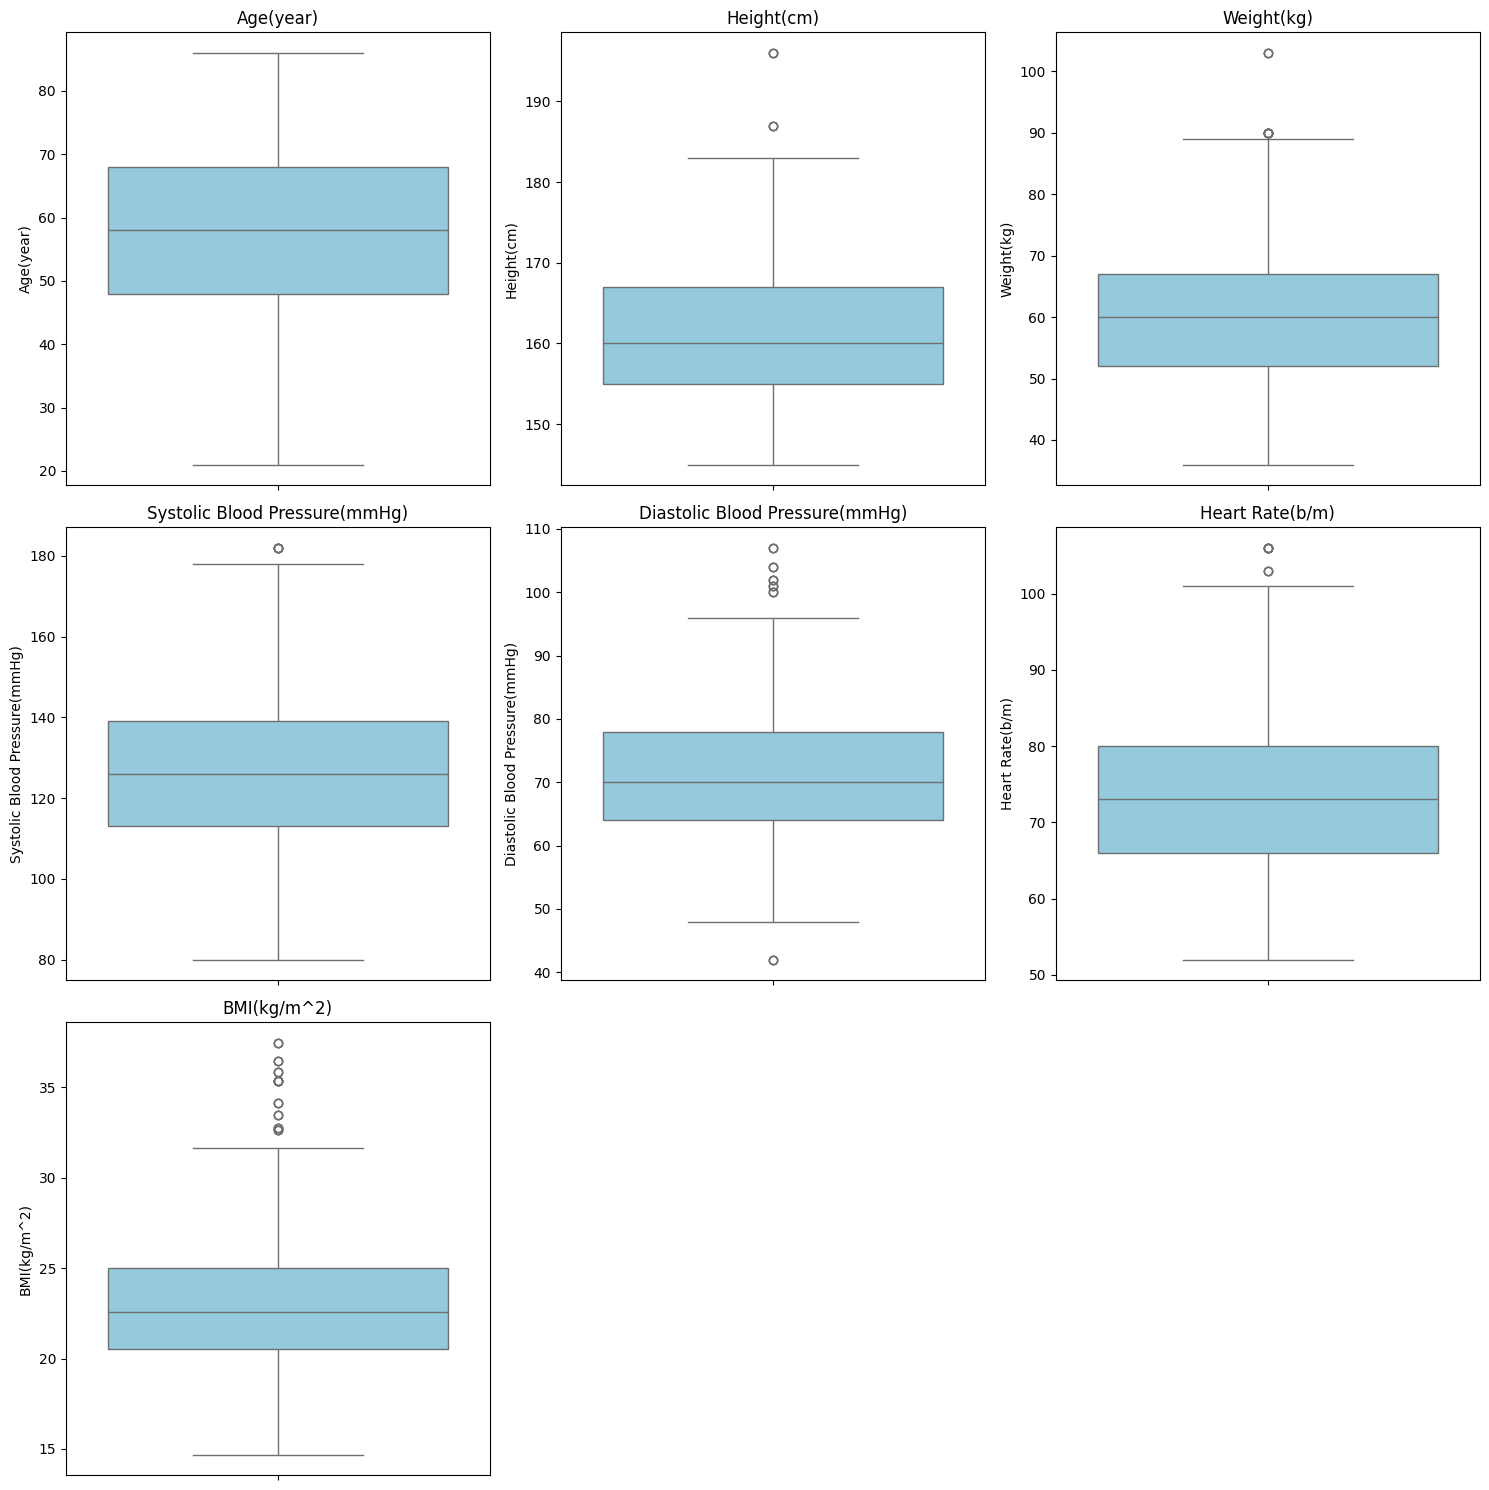

In [10]:
# Boxplot 시각화
plt.figure(figsize=(15, 15))

graph_features = ['Age(year)', 'Height(cm)', 'Weight(kg)', 'Systolic Blood Pressure(mmHg)',
                  'Diastolic Blood Pressure(mmHg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)']
for i, feature in enumerate(graph_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=ppg_data_combined[feature], color='skyblue')
    plt.title(feature)

plt.tight_layout()
plt.show()

In [11]:
ppg_data_combined.shape

(657, 2114)

In [12]:
data_systolic = ppg_data_combined["Systolic Blood Pressure(mmHg)"]
data_diastolic = ppg_data_combined["Diastolic Blood Pressure(mmHg)"]
data_sex = ppg_data_combined["Sex(M/F)"]
data_age = ppg_data_combined["Age(year)"]
data_height = ppg_data_combined["Height(cm)"]
data_weight = ppg_data_combined["Weight(kg)"]
data_hr = ppg_data_combined["Heart Rate(b/m)"]
data_bmi = ppg_data_combined["BMI(kg/m^2)"]

ppg_data = ppg_data_combined.iloc[:,14:]

data_personal = pd.concat([data_sex, data_age, data_height, data_weight, data_hr, data_bmi], axis=1)

In [13]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(data_personal)

# Transform the data
normalized_data = scaler.transform(data_personal)

In [14]:
# Convert back to a DataFrame (optional, if you need the result as a DataFrame)
normalized_df = pd.DataFrame(normalized_data, columns=data_personal.columns)

ppg_data = np.array(ppg_data)
data_personal = np.array(normalized_df)
print(ppg_data)
print(data_personal)

[[2438 2438 2438 ... 1827 1754 1754]
 [2201 2201 2171 ... 1997 1997 1997]
 [2019 2014 2014 ... 1924 1929 1929]
 ...
 [3083 3039 3071 ... 2422 2451 2379]
 [2426 2431 2446 ... 3103 3146 3151]
 [2691 2718 2743 ... 2611 2639 2623]]
[[0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 [0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 [0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 ...
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]]


In [16]:
# Assuming bp_data has columns 'systolic' and 'diastolic'
# Normalize blood pressure data
bp_data = np.array([data_systolic, data_diastolic]).T
print(bp_data)

[[161  89]
 [161  89]
 [161  89]
 ...
 [108  68]
 [108  68]
 [108  68]]


In [17]:
# Split the data into training and testing sets
X_train2100, X_test2100, y_train, y_test = train_test_split(ppg_data, bp_data, test_size=0.15, random_state=42)
X_train6, X_test6, y_train, y_test = train_test_split(data_personal, bp_data, test_size=0.15, random_state=42)

In [18]:
# PPG Signal (2100, 1)으로 변환
X_train2100 = np.reshape(X_train2100, (X_train2100.shape[0], X_train2100.shape[1], 1))
X_test2100 = np.reshape(X_test2100, (X_test2100.shape[0], X_test2100.shape[1], 1))

In [19]:
# Personal Data (6, 1)으로 변환
X_train6 = np.reshape(X_train6, (X_train6.shape[0], X_train6.shape[1], 1))
X_test6 = np.reshape(X_test6, (X_test6.shape[0], X_test6.shape[1], 1))

In [20]:
print(X_test2100.shape)
print(X_test6.shape)

(99, 2100, 1)
(99, 6, 1)


In [81]:
class HyperLoss(tf.keras.losses.Loss):
    def __init__(self , threshold=4,**kwargs):
        self.threshold = threshold
        super(HyperLoss ,self).__init__(**kwargs)
    def call(self, y_true ,  y_pred):
        error = y_true - y_pred
        is_samll = tf.abs(error)<self.threshold
        square_loss = tf.square(error)/2.0
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2.0
        return tf.where(is_samll , square_loss , linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold":self.threshold}

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, BatchNormalization, Activation, Add, Flatten, Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras.layers import Concatenate

# ResNet 블록 정의
def resnet_block(x, filters, kernel_size=3, strides=1):
    shortcut = x

    x = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(filters, kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    if strides != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Transformer Encoder 블록 정의
def transformer_encoder(x, num_heads=4, key_dim=32, ff_dim=128, dropout_rate=0.1):
    # x의 차원을 (batch, seq_len, feature_dim)으로 변환
    x = Dense(key_dim, activation='relu')(x)
    x = tf.keras.layers.Reshape((6, key_dim))(x)  # Reshape 추가

    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x, x)
    attn_output = Dropout(dropout_rate)(attn_output)
    x = LayerNormalization(epsilon=1e-6)(x + attn_output)

    ff_output = Dense(ff_dim, activation='relu')(x)
    ff_output = Dense(x.shape[-1])(ff_output)
    ff_output = Dropout(dropout_rate)(ff_output)

    x = LayerNormalization(epsilon=1e-6)(x + ff_output)
    return x

# 첫 번째 입력: Personal Data (Transformer Encoder 사용)
input1 = Input(shape=(6, 1), name='Input1')
x1 = Dense(32, activation='relu')(input1)
x1 = transformer_encoder(x1, num_heads=4, key_dim=32, ff_dim=128)
x1 = Flatten()(x1)

# 두 번째 입력: PPG Signal (ResNet 사용)
input2 = Input(shape=(2100, 1), name='Input2')
x2 = Conv1D(64, kernel_size=7, strides=2, padding='same')(input2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = resnet_block(x2, 64)
x2 = resnet_block(x2, 64)
x2 = resnet_block(x2, 128, strides=2)
x2 = resnet_block(x2, 128)
x2 = resnet_block(x2, 256, strides=2)
x2 = resnet_block(x2, 256)
x2 = GlobalAveragePooling1D()(x2)

# 두 경로를 병합 (Concatenation)
merged = Concatenate()([x1, x2])

# Dense layers
x = Dense(64, activation='relu')(merged)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)

# SBP와 DBP 예측 후 결합하여 반환 (선형 활성화 함수 사용)
output = Dense(2, activation='linear', name='BP')(x)

# 모델 정의
model = Model(inputs=[input1, input2], outputs=output)

# Adamax 옵티마이저 사용, 학습률 0.005로 설정
optimizer = Adamax(learning_rate=0.005)

# 모델 컴파일: 손실 함수로 MSE 사용
#model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
model.compile(optimizer=optimizer, loss=HyperLoss(), metrics=['mse'])


# 모델 요약 출력
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input2 (InputLayer)       │ (None, 2100, 1)        │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_45 (Conv1D)        │ (None, 1050, 64)       │            512 │ Input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_45    │ (None, 1050, 64)       │            256 │ conv1d_45[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_39             │ (None, 1050, 64)       │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_46 (Conv1D)        │ (None, 1050, 64)       │         12,352 │ activation_39[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_46    │ (None, 1050, 64)       │            256 │ conv1d_46[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_40             │ (None, 1050, 64)       │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_47 (Conv1D)        │ (None, 1050, 64)       │         12,352 │ activation_40[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_47    │ (None, 1050, 64)       │            256 │ conv1d_47[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_26 (Add)              │ (None, 1050, 64)       │              0 │ batch_normalization_4… │
│                           │                        │                │ activation_39[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_41             │ (None, 1050, 64)       │              0 │ add_26[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_48 (Conv1D)        │ (None, 1050, 64)       │         12,352 │ activation_41[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_48    │ (None, 1050, 64)       │            256 │ conv1d_48[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_42             │ (None, 1050, 64)       │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_49 (Conv1D)        │ (None, 1050, 64)       │         12,352 │ activation_42[0][0]    │
├──────────────────────

 Total params: 1,019,818 (3.89 MB)

 Trainable params: 1,015,338 (3.87 MB)

 Non-trainable params: 4,480 (17.50 KB)

In [83]:
# 콜백 함수 설정: 조기 종료(EarlyStopping) 및 최적 가중치 저장(ModelCheckpoint)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [98]:
# 모델 훈련
history = model.fit(
    [X_train6, X_train2100], y_train,  # 훈련 데이터
    epochs=500,  # 총 500 에포크
    batch_size=128,  # 배치 크기 128
    validation_split=0.2  # 훈련 데이터의 20%를 검증 데이터로 사용
    #callbacks=[early_stopping]
)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 36.7344 - mse: 216.0595 - val_loss: 40.8892 - val_mse: 246.1128
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 34.4827 - mse: 196.7500 - val_loss: 40.7521 - val_mse: 247.0586
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 34.4323 - mse: 194.9981 - val_loss: 40.6417 - val_mse: 246.5645
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 35.6539 - mse: 212.4133 - val_loss: 40.2161 - val_mse: 241.9511
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 36.2267 - mse: 214.7455 - val_loss: 46.0642 - val_mse: 310.7778
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 34.9444 - mse: 198.3705 - val_loss: 57.9875 - val_mse: 447.7771
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 35.0381 - mse: 204.7404 - val_loss: 58.8490 - val_mse: 466.0857
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 35.8872 - mse: 210.2771 - val_loss: 57.9164 - val_mse: 449.0347
Epoch 9/500
4/4 

In [99]:
predicted_bp = model.predict([X_test6, X_test2100])
print(predicted_bp)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[103.90755   61.460827]
 [135.97554   62.893623]
 [136.80884   63.25333 ]
 [120.52392   68.43894 ]
 [106.562546  43.203835]
 [132.66907   74.06886 ]
 [107.49119   75.70312 ]
 [120.578094  64.46104 ]
 [152.62529   86.23999 ]
 [117.70802   50.580067]
 [127.2529    69.864914]
 [118.43988   69.22058 ]
 [ 67.43951   40.86887 ]
 [122.91463   64.19757 ]
 [149.603     72.071014]
 [137.83311   83.63908 ]
 [116.518745  60.85865 ]
 [118.799164  70.80214 ]
 [117.21741   69.86003 ]
 [131.4422    77.434654]
 [ 87.86451   58.235706]
 [114.836845  52.444702]
 [135.3876    64.92068 ]
 [113.9937    52.566875]
 [108.06324   50.434486]
 [112.05004   60.765217]
 [106.328766  48.731464]
 [118.18518   47.51671 ]
 [119.582664  76.14603 ]
 [126.67947   76.28212 ]
 [131.34053   74.7307  ]
 [ 90.845634  55.1028  ]
 [148.67984   84.78405 ]
 [105.61599   65.895805]
 [148.03137   81.72348 ]
 [147.7323    79.16944 ]
 [118.08286   51.27865 ]
 [125.1503    69.39882 ]
 [128.46571 

In [100]:
# Systolic values
y_test_systolic = y_test[:, 0]
predicted_systolic = predicted_bp[:, 0]

In [101]:
# Diastolic values
y_test_diastolic = y_test[:, 1]
predicted_diastolic = predicted_bp[:, 1]

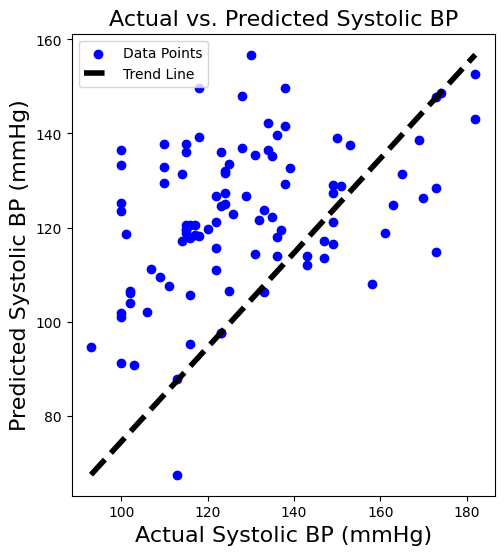

In [102]:
# Plotting actual vs. predicted Systolic Blood Pressure
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_systolic, predicted_systolic, label='Data Points', color='blue')
plt.plot([y_test_systolic.min(), y_test_systolic.max()], [predicted_systolic.min(), predicted_systolic.max()], 'k--', lw=4, label='Trend Line')
plt.xlabel('Actual Systolic BP (mmHg)', fontsize=16)
plt.ylabel('Predicted Systolic BP (mmHg)', fontsize=16)
plt.title('Actual vs. Predicted Systolic BP', fontsize=16)
plt.legend()

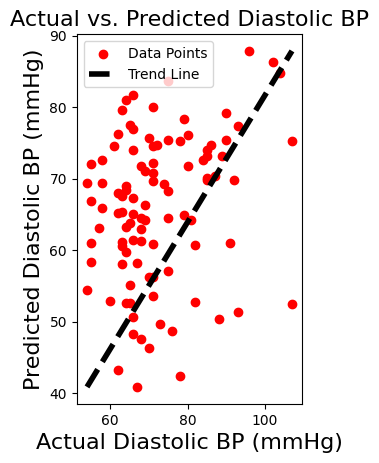

In [103]:
# Plotting actual vs. predicted Diastolic Blood Pressure
plt.subplot(1, 2, 2)
plt.scatter(y_test_diastolic, predicted_diastolic, label='Data Points', color='red')
plt.plot([y_test_diastolic.min(), y_test_diastolic.max()], [predicted_diastolic.min(), predicted_diastolic.max()], 'k--', lw=4, label='Trend Line')
plt.xlabel('Actual Diastolic BP (mmHg)', fontsize=16)
plt.ylabel('Predicted Diastolic BP (mmHg)', fontsize=16)
plt.title('Actual vs. Predicted Diastolic BP', fontsize=16)
plt.legend()

In [104]:
plt.tight_layout()
plt.savefig('SBP-DBP-prediction.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

In [105]:
# Bland-Altman Plot for Systolic Blood Pressure
mean_systolic = np.mean([y_test_systolic, predicted_systolic], axis=0)
diff_systolic = y_test_systolic - predicted_systolic
mean_diff_systolic = np.mean(diff_systolic)
std_diff_systolic = np.std(diff_systolic)
upper_limit_systolic = mean_diff_systolic + 1.96 * std_diff_systolic
lower_limit_systolic = mean_diff_systolic - 1.96 * std_diff_systolic

# Bland-Altman Plot for Diastolic Blood Pressure
mean_diastolic = np.mean([y_test_diastolic, predicted_diastolic], axis=0)
diff_diastolic = y_test_diastolic - predicted_diastolic
mean_diff_diastolic = np.mean(diff_diastolic)
std_diff_diastolic = np.std(diff_diastolic)
upper_limit_diastolic = mean_diff_diastolic + 1.96 * std_diff_diastolic
lower_limit_diastolic = mean_diff_diastolic - 1.96 * std_diff_diastolic

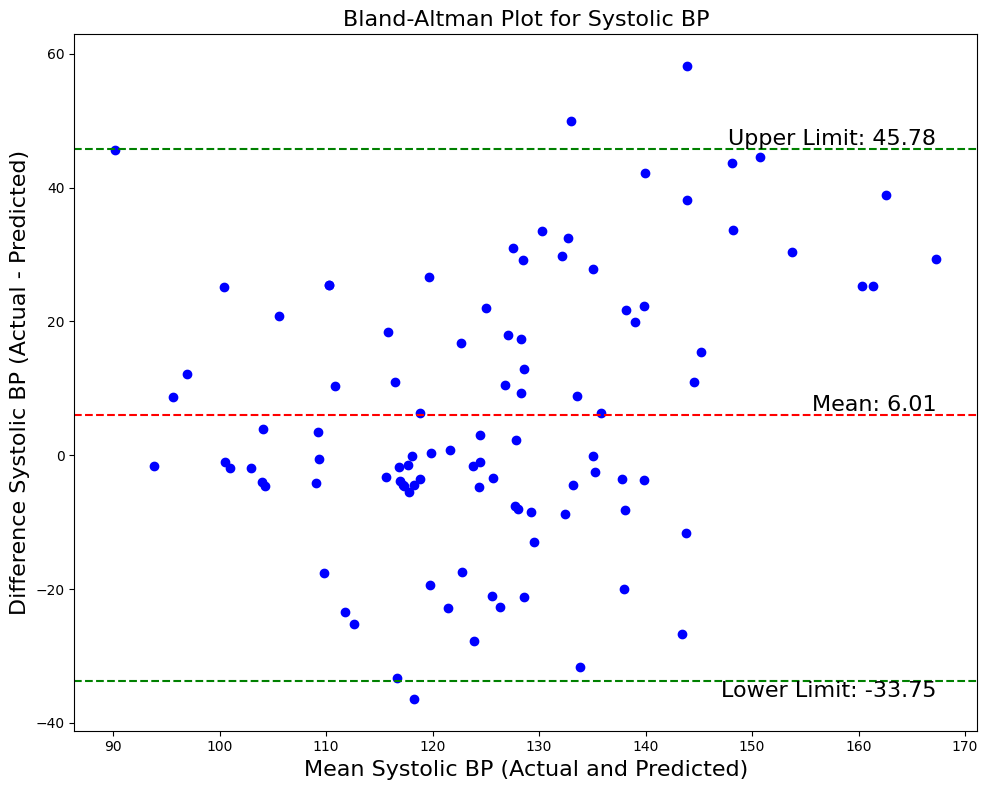

In [106]:
plt.figure(figsize=(10, 8))
# Systolic Bland-Altman Plot
# plt.subplot(1, 2, 1)
plt.scatter(mean_systolic, diff_systolic, color='blue')
plt.axhline(mean_diff_systolic, color='red', linestyle='--')
plt.axhline(mean_diff_systolic + 1.96 * std_diff_systolic, color='green', linestyle='--')
plt.axhline(mean_diff_systolic - 1.96 * std_diff_systolic, color='green', linestyle='--')
plt.text(x=max(mean_systolic), y=mean_diff_systolic, s=f'Mean: {mean_diff_systolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_systolic), y=upper_limit_systolic, s=f'Upper Limit: {upper_limit_systolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_systolic), y=lower_limit_systolic, s=f'Lower Limit: {lower_limit_systolic:.2f}', va='top', ha='right', fontsize=16)
plt.xlabel('Mean Systolic BP (Actual and Predicted)', fontsize=16)
plt.ylabel('Difference Systolic BP (Actual - Predicted)', fontsize=16)
plt.title('Bland-Altman Plot for Systolic BP', fontsize=16)
plt.tight_layout()
plt.savefig('Bland-Altman-Plot-SBP.png', dpi=300)
plt.show()

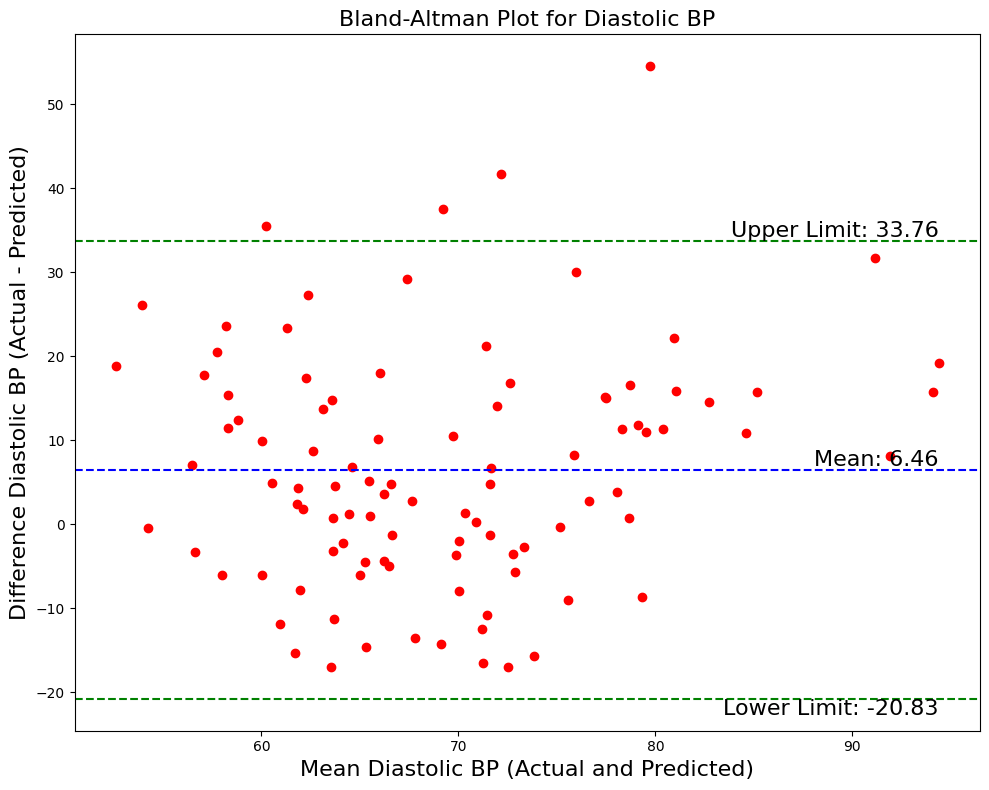

In [107]:
# Diastolic Bland-Altman Plot
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)
plt.scatter(mean_diastolic, diff_diastolic, color='red')
plt.axhline(mean_diff_diastolic, color='blue', linestyle='--')
plt.axhline(mean_diff_diastolic + 1.96 * std_diff_diastolic, color='green', linestyle='--')
plt.axhline(mean_diff_diastolic - 1.96 * std_diff_diastolic, color='green', linestyle='--')
plt.text(x=max(mean_diastolic), y=mean_diff_diastolic, s=f'Mean: {mean_diff_diastolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_diastolic), y=upper_limit_diastolic, s=f'Upper Limit: {upper_limit_diastolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_diastolic), y=lower_limit_diastolic, s=f'Lower Limit: {lower_limit_diastolic:.2f}', va='top', ha='right', fontsize=16)
plt.xlabel('Mean Diastolic BP (Actual and Predicted)', fontsize=16)
plt.ylabel('Difference Diastolic BP (Actual - Predicted)', fontsize=16)
plt.title('Bland-Altman Plot for Diastolic BP', fontsize=16)

plt.tight_layout()
plt.savefig('Bland-Altman-Plot-DBP.png', dpi=300)
plt.show()

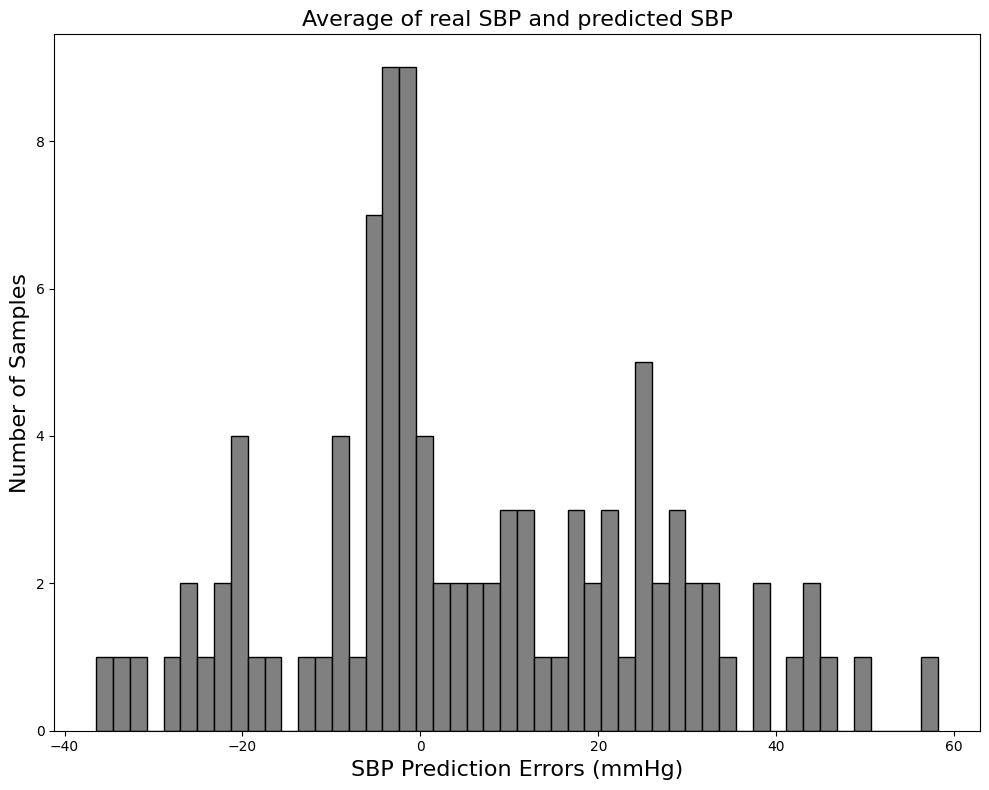

In [108]:
# Calculate prediction errors
errors_systolic = y_test_systolic - predicted_systolic
errors_diastolic = y_test_diastolic - predicted_diastolic

# Create histograms
plt.figure(figsize=(10, 8))

# Histogram for Systolic Blood Pressure Errors
# plt.subplot(1, 2, 1)
plt.hist(errors_systolic, bins=50, color='gray', edgecolor='black')
plt.xlabel('SBP Prediction Errors (mmHg)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Average of real SBP and predicted SBP', fontsize=16)
plt.tight_layout()
plt.savefig('Prediction-errors-SBP.png', dpi=300)
plt.show()

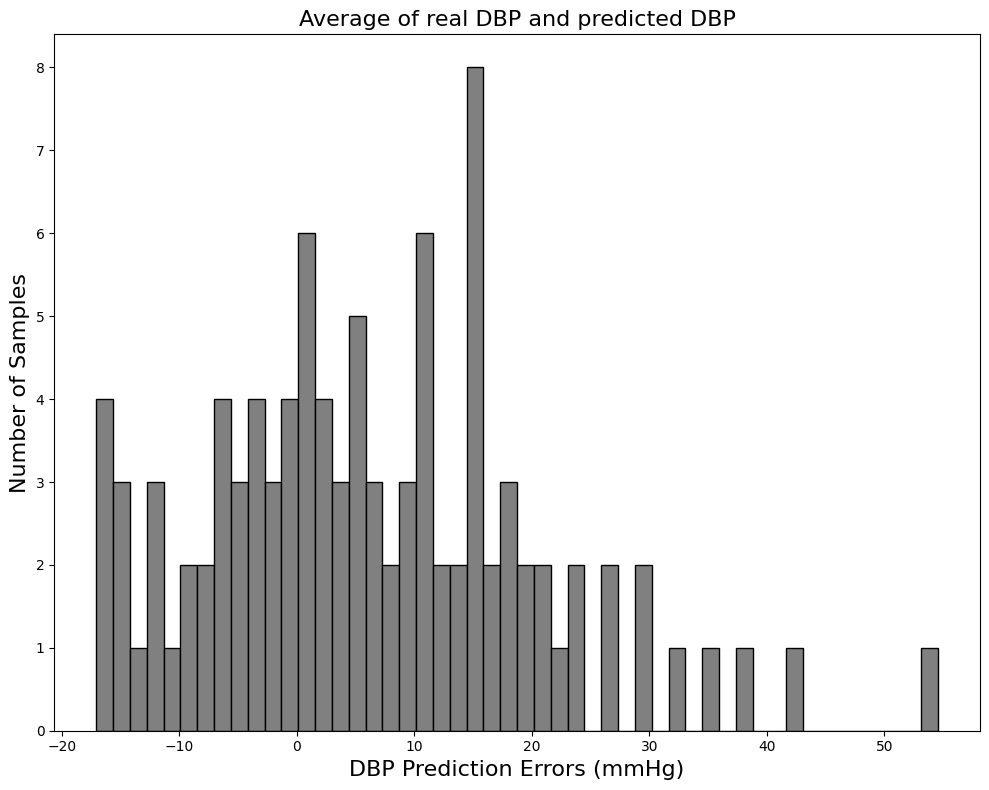

In [109]:
# Histogram for Diastolic Blood Pressure Errors
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)
plt.hist(errors_diastolic, bins=50, color='gray', edgecolor='black')
plt.xlabel('DBP Prediction Errors (mmHg)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Average of real DBP and predicted DBP', fontsize=16)

plt.tight_layout()
plt.savefig('Prediction-errors-DBP.png', dpi=300)
plt.show()

In [110]:
# Calculate MAE
mae_systolic = np.mean(np.abs(errors_systolic))
mae_diastolic = np.mean(np.abs(errors_diastolic))

# Calculate MAPD
mapd_systolic = np.mean(np.abs(errors_systolic / y_test_systolic)) * 100
mapd_diastolic = np.mean(np.abs(errors_diastolic / y_test_diastolic)) * 100

# Calculate Cumulative Percentages (CP)
cp_systolic_5 = np.mean(np.abs(errors_systolic) <= 5) * 100
cp_systolic_10 = np.mean(np.abs(errors_systolic) <= 10) * 100
cp_systolic_15 = np.mean(np.abs(errors_systolic) <= 15) * 100
cp_diastolic_5 = np.mean(np.abs(errors_diastolic) <= 5) * 100
cp_diastolic_10 = np.mean(np.abs(errors_diastolic) <= 10) * 100
cp_diastolic_15 = np.mean(np.abs(errors_diastolic) <= 15) * 100

# Calculate ME
me_systolic = np.mean(errors_systolic)
me_diastolic = np.mean(errors_diastolic)

# Calculate SD
sd_systolic = np.std(errors_systolic)
sd_diastolic = np.std(errors_diastolic)

In [112]:
# Printing results
print("Systolic BP:")
print(f"MAE: {mae_systolic:.3f} mmHg")
print(f"MAPD: {mapd_systolic:.3f}%")
print(f"CP within 5 mmHg: {cp_systolic_5:.3f}%")
print(f"CP within 10 mmHg: {cp_systolic_10:.3f}%")
print(f"CP within 15 mmHg: {cp_systolic_15:.3f}%")
print(f"ME: {me_systolic:.3f} mmHg")
print(f"SD: {sd_systolic:.3f} mmHg")

print("\nDiastolic BP:")
print(f"MAE: {mae_diastolic:.3f} mmHg")
print(f"MAPD: {mapd_diastolic:.3f}%")
print(f"CP within 5 mmHg: {cp_diastolic_5:.3f}%")
print(f"CP within 10 mmHg: {cp_diastolic_10:.3f}%")
print(f"CP within 15 mmHg: {cp_diastolic_15:.3f}%")
print(f"ME: {me_diastolic:.3f} mmHg")
print(f"SD: {sd_diastolic:.3f} mmHg")

Systolic BP:
MAE: 16.319 mmHg
MAPD: 12.242%
CP within 5 mmHg: 32.323%
CP within 10 mmHg: 43.434%
CP within 15 mmHg: 51.515%
ME: 6.014 mmHg
SD: 20.288 mmHg

Diastolic BP:
MAE: 11.844 mmHg
MAPD: 15.810%
CP within 5 mmHg: 31.313%
CP within 10 mmHg: 47.475%
CP within 15 mmHg: 68.687%
ME: 6.464 mmHg
SD: 13.928 mmHg
